# CHAPTER-2  (SAMPLING)

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install Scipy

Note: you may need to restart the kernel to use updated packages.


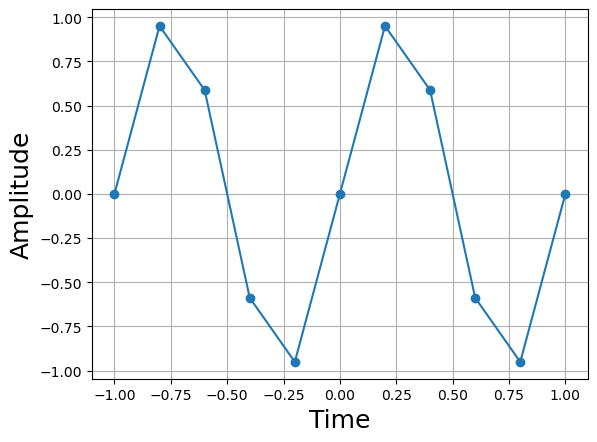

In [6]:
#2.1
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots()
f = 1.0 # Hz, signal frequency
fs = 5.0 # Hz, sampling rate (ie. >= 2*f)
t=np.arange(-1,1+1/fs,1/fs) # sample interval, symmetric
# for convenience later
x =np.sin(2*np.pi*f*t)
ax.plot(t,x,'o-')
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)
plt.grid()

Text(0, 0.5, 'Amplitude')

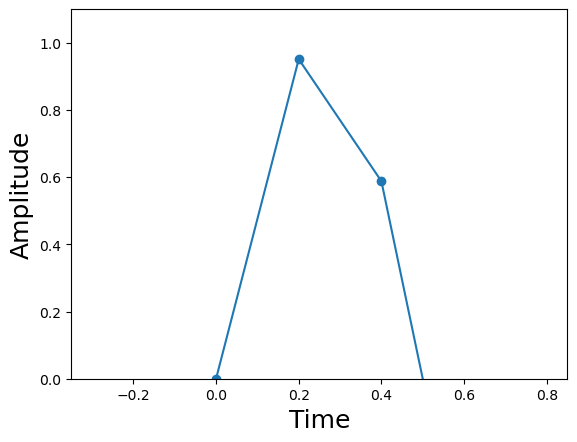

In [7]:
#2.2
fig,ax =plt.subplots()
ax.plot(t,x,'o-')
ax.axis(xmin = 1/(4*f)-1/fs*3,
xmax = 1/(4*f)+1/fs*3,
ymin = 0,
ymax = 1.1 )
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)

In [8]:
#2.3
import numpy as np
from math import sin,pi
from matplotlib import pyplot as plt
interval=[] # piecewise domains
apprx =[] # line on domains
# build up points *evenly* inside of intervals
tp=np.hstack([np.linspace(t[i],t[i+1],20,False) for i in range(len(t)-1)])
# construct arguments for piecewise
for i in range(len(t)-1):
 interval.append(np.logical_and(t[i]<=tp,tp<t[i+1]))
 apprx.append((x[i+1]-x[i])/(t[i+1]-t[i])*(tp[interval[-1]]-t[i])+x[i])
x_hat=np.piecewise(tp,interval,apprx) # piecewise linear approximation

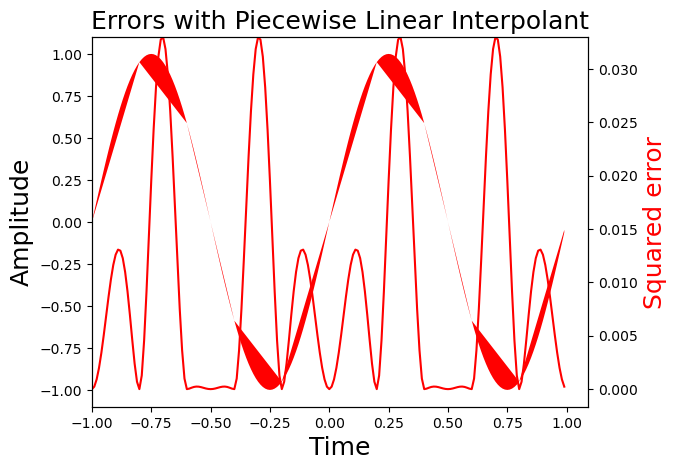

In [9]:
#2.4
fig,ax1=plt.subplots()
 # fill in the difference between the interpolant and the sine
ax1.fill_between(tp,x_hat,np.sin(2*np.pi*f*tp),facecolor='red')
ax1.set_xlabel('Time',fontsize=18)
ax1.set_ylabel('Amplitude',fontsize=18)
ax2 = ax1.twinx() # create clone of ax1
sqe = (x_hat-np.sin(2*np.pi*f*tp))**2 #compute squared-error
ax2.plot(tp, sqe,'r')
ax2.axis(xmin=-1,ymax= sqe.max() )
ax2.set_ylabel('Squared error', color='r',fontsize=18)
ax1.set_title('Errors with Piecewise Linear Interpolant',fontsize=18)
plt.show()

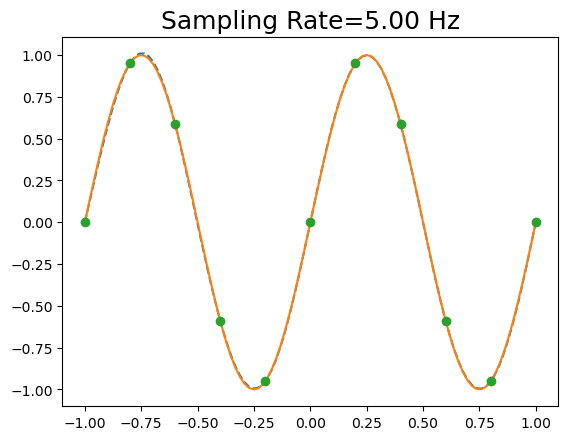

In [10]:
#2.5
fig,ax=plt.subplots()
t =np.linspace(-1,1,100) # redefine this here for convenience
ts =np.arange(-1,1+1/fs,1/fs) # sample points
num_coeffs=len(ts)
sm=0
for k in range(-num_coeffs,num_coeffs): # since function is real, need both sides
 sm+=np.sin(2*np.pi*(k/fs))*np.sinc(k - fs*t)
ax.plot(t,sm,'--',t,np.sin(2*np.pi*t),ts,np.sin(2*np.pi*ts),'o')
ax.set_title('Sampling Rate=%3.2f Hz' % fs, fontsize=18 )
plt.show()

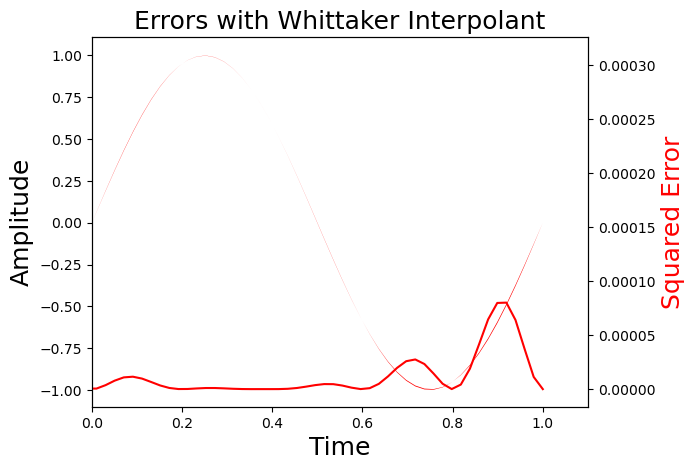

In [11]:
#2.6
fig,ax1=plt.subplots()
ax1.fill_between(t,sm,np.sin(2*np.pi*f*t),facecolor='red')
ax1.set_ylabel('Amplitude',fontsize=18)
ax1.set_xlabel('Time',fontsize=18)
ax2 = ax1.twinx()
sqe = (sm - np.sin(2*np.pi*f*t))**2
ax2.plot(t, sqe,'r')
ax2.axis(xmin=0,ymax = sqe.max())
ax2.set_ylabel('Squared Error', color='r',fontsize=18)
ax1.set_title(r'Errors with Whittaker Interpolant',fontsize=18)
plt.show()

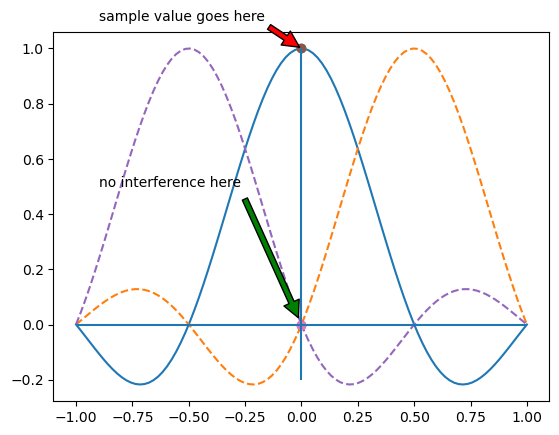

In [12]:
#2.7
fig,ax=plt.subplots()
k=0
fs=2 # makes this plot easier to read
ax.plot(t,np.sinc(k - fs * t),
t,np.sinc(k+1 - fs * t),'--',k/fs,1,'o',(k)/fs,0,'o',
t,np.sinc(k-1 - fs * t),'--',k/fs,1,'o',(-k)/fs,0,'o')
ax.hlines(0,-1,1) # horizontal lines
ax.vlines(0,-.2,1) # vertical lines
ax.annotate('sample value goes here',
xy=(0,1), # arrowhead position
xytext=(-1+.1,1.1),# text position
arrowprops={'facecolor':'red','shrink':0.05},
)
ax.annotate('no interference here',
xy=(0,0),
xytext=(-1+.1,0.5),
arrowprops={'facecolor':'green','shrink':0.05},
)
plt.show()

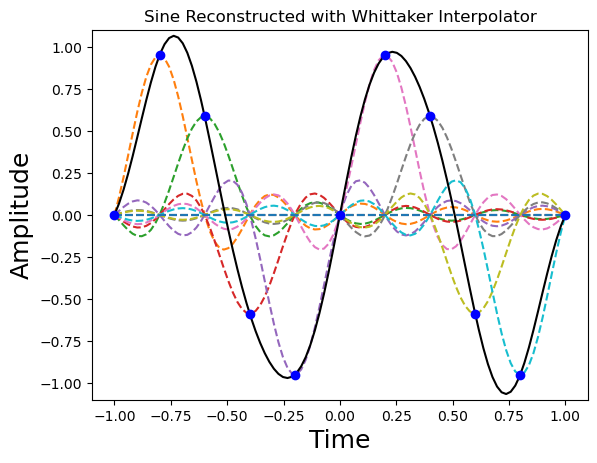

In [13]:
#2.8
fs=5.0 # sampling rate
k=np.array(sorted(set((t*fs).astype(int)))) # sorted coefficient list
fig,ax =plt.subplots()
ax.plot(t,(np.sin(2*np.pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).T,'--', # individualwhittaker functions
        t,(np.sin(2*np.pi*(k[:,None]/fs))*np.sinc(k[:,None]-fs*t)).sum(axis=0),'k-', # whittaker interpolant 
k/fs,np.sin(2*np.pi*k/fs),'ob')# samples
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)
ax.set_title('Sine Reconstructed with Whittaker Interpolator')
ax.axis((-1.1,1.1,-1.1,1.1));

Text(3.1, 0.5, '... and going...')

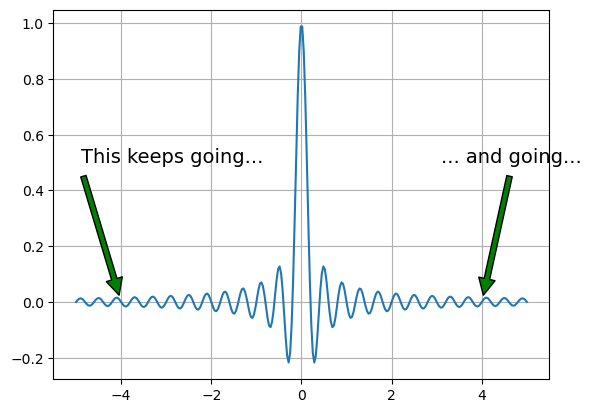

In [15]:
#2.9
t =np.linspace(-5,5,300) # redefine this here for convenience
fig,ax =plt.subplots()
fs=5.0 # sampling rate
ax.plot(t,np.sinc(fs * t))
ax.grid() # put grid on axes
ax.annotate('This keeps going...',
xy=(-4,0),
xytext=(-5+.1,0.5),
arrowprops={'facecolor':'green','shrink':0.05},fontsize=14)
ax.annotate('... and going...',
xy=(4,0),
xytext=(3+.1,0.5),
arrowprops={'facecolor':'green','shrink':0.05},fontsize=14)

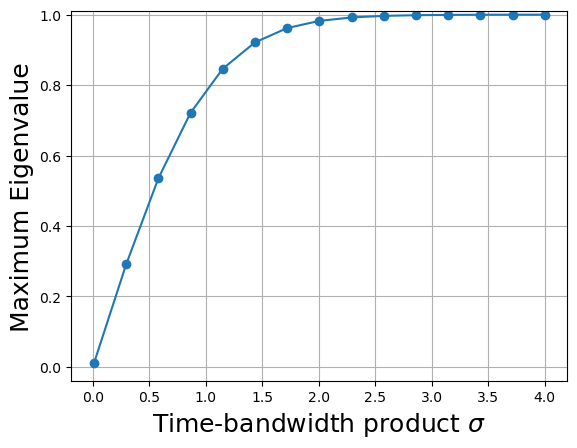

In [16]:
#2.10
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi,sin
from scipy.linalg import eigvalsh

def kernel(x,sigma=1):
    'convenient function to compute kernel of eigenvalue problem'
    x= np.asanyarray(x) # ensure x is array
    y =np.pi*np.where(x == 0,1.0e-20, x)# avoid divide by zero
    return np.sin(sigma/2*y)/y


nstep=100 # quick and dirty integral quantization
t =np.linspace(-1,1,nstep) # quantization of time
dt =np.diff(t)[0] # differential step size
def eigv(sigma):
    return eigvalsh(kernel(t-t[:,None],sigma)).max() # compute max eigenvalue
sigma =np.linspace(0.01,4,15) # range of time-bandwidth products to consider
fig,ax =plt.subplots()
ax.plot(sigma, dt*np.array([eigv(i) for i in sigma]),'-o')
ax.set_xlabel('Time-bandwidth product $\sigma$',fontsize=18)
ax.set_ylabel('Maximum Eigenvalue',fontsize=18)
ax.axis(ymax=1.01)
ax.grid()
plt.show()

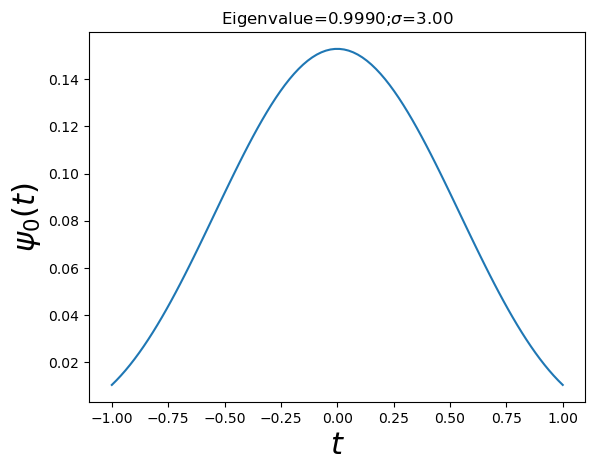

In [17]:
#2.11
sigma=3 # time-bandwidth product
w,v=np.linalg.eigh(kernel(t-t[:,None],sigma)) # eigen-system
maxv=v[:, w.argmax()] # eigenfunction for max eigenvalue
fig,ax=plt.subplots()
ax.plot(t,maxv)
ax.set_xlabel('$t$',fontsize=22)
ax.set_ylabel('$\psi_0(t)$',fontsize=22)
ax.set_title('Eigenvalue=%3.4f;$\sigma$=%3.2f'%(w.max()*dt,sigma))
plt.show()

Text(0.5, 1.0, '$\\sigma=5$')

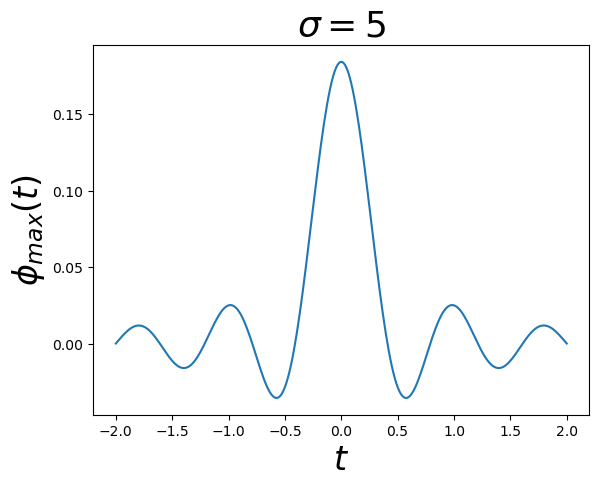

In [18]:
#2.12
def kernel_tau(x,W=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = np.asanyarray(x)
    y=np.pi*np.where(x == 0,1.0e-20, x) # avoid divide by zero
    return np.sin(2*W*y)/y

nstep=300 # quick and dirty integral quantization
t =np.linspace(-1,1,nstep) # quantization of time
tt =np.linspace(-2,2,nstep)# extend interval
sigma = 5
W= sigma/2./2./t.max()
w,v=np.linalg.eig(kernel_tau(t-tt[:,None],W)) # compute e-vectors/e-values
maxv=v[:,w.real.argmax()].real # take real part
fig,ax =plt.subplots()
ax.plot(tt,maxv/np.sign(maxv[nstep//2])) # normalize for orientation
ax.set_xlabel('$t$',fontsize=24)
ax.set_ylabel(r'$\phi_{max}(t)$',fontsize=24)
ax.set_title('$\sigma=%d$'%(2*W*2*t.max()),fontsize=26)

In [19]:
#2.13
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
from mpl_toolkits.mplot3d import art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import gridspec

def facet_filled(x,alpha=0.5,color='b'):
    'construct 3D facet from adjacent points filled to zero'
    a,b=x
    a0= a*np.array([1,1,0])
    b0= b*np.array([1,1,0])
    ve = np.vstack([a,a0,b0,b]) # create closed polygon facet
    poly = Poly3DCollection([ve]) # create facet
    poly.set_alpha(alpha) # set transparency
    poly.set_color(color)
    return poly
def drawDFTView(X,ax=None,fig=None):
    'Draws 3D diagram given DFT matrix'
    a=2*np.pi/len(X)*np.arange(len(X))
    d=np.vstack([np.cos(a),np.sin(a),np.array(abs(X)).flatten()]).T
    if ax is None and fig is None:
        fig = plt.figure()
        fig.set_size_inches(6,6)
    if ax is None: # add ax to existing figure
        ax = fig.add_subplot(1, 1, 1, projection='3d')
       
    ax.axis([-1,1,-1,1]) # x-y limits
    ax.set_zlim([0,d[:,2].max()]) # z-limit
    ax.set_aspect("equal") # aspect ratio
    ax.view_init(azim=-30) # camera view position
    a=FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
    ax.add_patch(a)
    b=FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
    ax.add_patch(b)
    art3d.patch_2d_to_3d(a) # format 2D patch for 3D plot
    art3d.patch_2d_to_3d(b)
    ax.axis('off')
    sl=[slice(i,i+2) for i in range(d.shape[0]-2)] # collect neighboring points
    for s in sl:
        poly=facet_filled(d[s,:])
        ax.add_collection3d(poly)
            # edge polygons
    ax.add_collection3d(facet_filled(d[[-1,0],:]))
    ax.add_collection3d(facet_filled(d[[-2,-1],:]))
    
def drawInOut(X,v,return_axes=False):
    fig = plt.figure()
    fig.set_size_inches(8,8)
    gs = gridspec.GridSpec(8,6)
    ax1 = plt.subplot(gs[3:5,:2])
    ax2 = plt.subplot(gs[:,2:],projection='3d')
    ax1.stem(np.arange(len(v)),v)
    ymin,ymax= ax1.get_ylim()
    ax1.set_ylim(ymax = ymax*1.2, ymin = ymin*1.2)
    ax1.set_title('Signal')
    ax1.set_xlabel('n')
    ax1.tick_params(labelsize=8)
                
    drawDFTView(X,ax2)
    if return_axes:
        return ax1,ax2
